5 似たネットワークを作る―モデル化

ネットワークがどのようにして作られたか、そのメカニズムを知ることによって、似たようなネットワークを作ったり、今後どのように発展していくかを知る手掛かりになる。この章ではネットワークの基本的なモデルについて紹介する。

5.1 次数分布

各頂点につながる辺の本数を、その頂点の次数と呼ぶ。
ネットワークの次数分布とは、頂点の次数をX軸、頂点の頻度(割合)をY軸としたグラフのことである。
ネットワークの各頂点の次数がどのように分布しているかを知ることは、そのネットワークの特性を
理解する上で極めて重要である。例えば、各頂点の次数に大きな差がないネットワークと、
逆に次数に大きな偏りがあるネットワークとでは、一部の頂点の欠損に対する頑強性などが大きく異なる。

以下の例では、頂点数が同じであるが異なるネットワークモデルの次数分布を示している。
ランダムネットワークでは、多くの頂点の次数が平均次数に近いのに対し、
スケールフリーネットワークでは、極端に次数の大きい頂点が少数だが存在する。
完全グラフでは全ての頂点の次数が等しい。
Zachary's karate clubネットワークは実ネットワークであり頂点数も異なるが、比較のために並べて示した。次数の大きい頂点が少数存在し、ほとんどの頂点は次数が小さい。


Name: 
Type: Graph
Number of nodes: 100
Number of edges: 494
Average degree:   9.8800
Name: 
Type: Graph
Number of nodes: 100
Number of edges: 291
Average degree:   5.8200
Name: 
Type: Graph
Number of nodes: 100
Number of edges: 4950
Average degree:  99.0000
Name: Zachary's Karate Club
Type: Graph
Number of nodes: 34
Number of edges: 78
Average degree:   4.5882


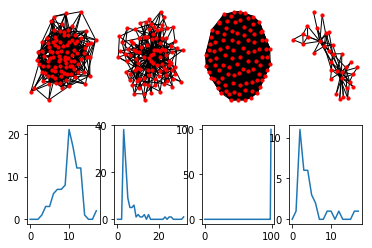

In [0]:
import networkx as nx
import matplotlib.pyplot as plt

er = nx.erdos_renyi_graph(100, 0.1)
plt.subplot(241)
nx.draw(er, node_size=10, node_color='red')
print(nx.info(er))
plt.subplot(245)
plt.plot(nx.degree_histogram(er))

ba = nx.barabasi_albert_graph(100, 3)
plt.subplot(242)
nx.draw(ba, node_size=10, node_color='red')
print(nx.info(ba))
plt.subplot(246)
plt.plot(nx.degree_histogram(ba))

K_100 = nx.complete_graph(100)
plt.subplot(243)
nx.draw(K_100, node_size=10, node_color='red')
print(nx.info(K_100))
plt.subplot(247)
plt.plot(nx.degree_histogram(K_100))

karate = nx.karate_club_graph()
plt.subplot(244)
nx.draw(karate, node_size=10, node_color='red')
print(nx.info(karate))
plt.subplot(248)
plt.plot(nx.degree_histogram(karate))

5.2 スケールフリーネットワーク

現実の社会ネットワークなどでは他の多くの頂点と結ばれている頂点が存在したり、クラスタ係数が大きかったりするなど、ランダムグラフの性質とは大きく異なっている。
この節では、ネットワークの生成のプロセスをモデル化する生成モデルについて述べる。実際のネットワークに近い性質を持つネットワークの生成モデルが明らかになれば、実際のネットワークがどのように作られたか、そのメカニズムの解明につながると考えられる。

以下のような性質を持つ生成モデルを考え、どのようなネットワークが得られるかを調べる。

*   成長：頂点が新たに追加され、減ることはない
*   優先的選択：新たに追加される頂点は、次数の高い頂点と高い確率で辺で結ばれる

この具体例として、BAモデル(Barabasi-Albert)がよく知られている。ネットワークに頂点を追加していき、既にある頂点の中から次数に比例する確率で選んだ頂点と新しい頂点との間に辺を張る処理を繰り返してネットワークを生成する。以下のプログラムでは、そのようにして得られたネットワークの例を示す。次数分布を見ると、次数が小さい頂点が多いのに対し、次数が非常に大きい頂点がわずかながら存在していることがわかる。一番下のグラフは、次数分布のX軸とY軸を対数目盛にした両対数グラフである。このようにすると直線になることから、元の次数分布はべき関数($p_{k}=a\cdot k^{-\alpha}$)
に従っていることがわかる。このようなネットワークは次数分布に特徴的な尺度がないことから、スケールフリーネットワークと呼ばれたり、次数分布がべき法則(power law)に従うと言われたりする。





Name: 
Type: Graph
Number of nodes: 1000
Number of edges: 2991
Average degree:   5.9820


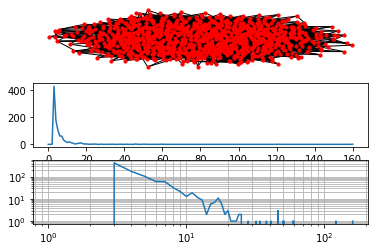

In [0]:
import networkx as nx
import matplotlib.pyplot as plt

ba = nx.barabasi_albert_graph(1000, 3)
plt.subplot(3,1,1)
nx.draw(ba, node_size=10, node_color='red')
print(nx.info(ba))
plt.subplot(3,1,2)
plt.plot(nx.degree_histogram(ba))
plt.subplot(3,1,3)
plt.xscale("log")
plt.yscale("log")
plt.grid(which="both")
plt.plot(nx.degree_histogram(ba))

5.3 スモールワールドネットワーク

現実の社会ネットワークにおいては、AとBが友人で、BとCが友人なら、AとCも友人同士であることが多い。従ってクラスタ係数は大きいことが多い。

また社会ネットワークにおいては、友人の友人の友人の...とたどっていくと、大多数の友人に比較的短い距離で到達できることが多い。実ネットワークにおける2頂点間の距離は、ネットワークの規模に比べて非常に短い距離でつながっていることが多いことが知られており、このような性質は「6次の隔たり(six degrees of separation)」などと呼ばれる。

クラスタ係数が大きいという性質は、これまでに述べたランダムグラフやスケールフリーグラフとは大きく異なっている。また2頂点間の距離が短いという性質はランダムグラフでは成立しているが、スケールフリーグラフとは大きく異なっている。

スモールワールドモデルは、クラスタ係数の大きいネットワークと、ランダムネットワークとを組み合わせることで、上記の二つの性質(推移性と短いパス長)を持つようなネットワークを生成するモデルである。

具体的には、クラスタ係数の大きいネットワークとして、円周上に頂点を配置して、各頂点は最近傍のk個の頂点と辺で結ばれているネットワークを考える。これは非常に規則的な構造であり、頂点の次数は全てkである。クラスタ係数は大きく、平均頂点間距離も大きい。次に、この辺の一部をランダムに変更(rewiring)することによって、ランダムグラフの要素を一部取り入れる。これによってクラスタ係数はまだ比較的大きく、かつ平均頂点間距離が小さいネットワークを生成することができる。rewiringを100%にすると完全なランダムグラフになり、クラスタ係数が小さく、平均頂点間距離も小さくなる。

生成モデルによって、現実のネットワークの性質の一部を満たすような人工的なネットワークを作ることができる。それによって、ネットワークの生成メカニズムを考察したり、得られた人工ネットワークを用いてネットワークアルゴリズムを検証したりすることができる。





rewiring 0%
12.878787878787879
0.5
rewiring 30%
3.74989898989899
0.15266666666666662
rewiring 100%
3.438787878787879
0.03708730158730158


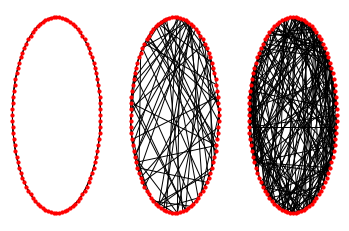

In [0]:
import networkx as nx
import matplotlib.pyplot as plt

plt.subplot(1,3,1)
ws0 = nx.watts_strogatz_graph(100, 4, 0)
nx.draw_circular(ws0, node_size=10, node_color='red')
print("rewiring 0%")
print(nx.average_shortest_path_length(ws0))
print(nx.average_clustering(ws0))
plt.subplot(1,3,2)
ws03 = nx.watts_strogatz_graph(100, 4, 0.3)
nx.draw_circular(ws03, node_size=10, node_color='red')
print("rewiring 30%")
print(nx.average_shortest_path_length(ws03))
print(nx.average_clustering(ws03))
plt.subplot(1,3,3)
ws1 = nx.watts_strogatz_graph(100, 4, 1)
nx.draw_circular(ws1, node_size=10, node_color='red')
print("rewiring 100%")
print(nx.average_shortest_path_length(ws1))
print(nx.average_clustering(ws1))